##PPGC - UFPEL
##2024/1 - 1110076 - 1 - TÓPICOS ESPECIAIS EM COMPUTAÇÃO IV - MINERAÇÃO DE DADOS EDUCACIONAIS

##Guilherme D. Lima - Mestrando em Computação

##Descrição da Atividade
Esse exercício de programação envolve modificar o código do exercício de
programação da Aula 3 para tornar esse um problema de regressão. Basicamente, no lugar de
predizer se o aluno foi aprovado, o modelo deve predizer qual será a nota final do aluno. E tem
ainda alguns pré-processamentos adicionais que vamos fazer.
Suponha que você foi contratado para ajudar a escola ‘EscolaLegal’ a melhorar a taxa
de aprovação em uma disciplina específica, que tem apresentado resultados abaixo do
esperado nos últimos anos. A escola ‘EscolaLegal’ disponibilizou uma base de dados aberta
que contém informações dos alunos que se matricularam na disciplina nos últimos 5 anos,
incluindo informações sobre suas notas nas edições anteriores, gênero, idade, carga horária
semanal de estudo, entre outras.
Você decide usar uma técnica de mineração de dados para construir um modelo que
possa prever, com base nas informações disponíveis, qual vai ser a nota final do aluno na
disciplina em questão. Para isso, você vai utilizar uma técnica de regressão.
Vamos utilizar a base de dados "student-performance" disponível no repositório UCI
Machine Learning. Essa base de dados contém informações sobre alunos nas disciplinas de
matemática e português de uma escola secundária em Portugal. Vamos criar um modelo que
preveja se um aluno terá sucesso ou não na disciplina de matemática ou português (você
escolhe) com base em algumas variáveis como gênero, idade, número de reprovações, carga
horária semanal de estudo, entre outras.

###1) Definição do Problema

A partir do enunciado você sabe que precisa prever a nota final do aluno na disciplina
de matemática ou português a partir de notas parciais e de outros dados.

* Você sabe que é um problema de regressão. Você precisa predizer a nota final do aluno
na disciplina.

* A nossa variável de saída (output label) é G3, ou seja, ela contém a nota a ser predita.
Vamos importar então os dados e interpretá-los para tentar entender melhor o
problema.

### Bibliotecas

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as srn
from scipy.stats import shapiro
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

###2) Carregamento dos Dados

Primeiramente, você deve baixar a base de dados do UCI Machine Learning que se encontra em https://archive.ics.uci.edu/ml/datasets/Student+Performance.

In [74]:
variable = 'student-mat.csv'
df = pd.read_csv(variable, delimiter=';')

### 3) Entendendo os dados a partir de uma análise descritiva

####3.1) Primeiramente, você pode usar o comando head(numero_linhas) para ter uma visualização rápida dos dados. Ele mostra as primeiras numero_linhas dos dados importados.

In [75]:
df.head(2)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

####3.2) Você pode também usar print(df.dtypes) para saber os tipos dos dados e print(df.shape) para ver o formato do dataframe (número de instâncias X número de variáveis). Você vai ver que o Pandas salvou as strings com o tipo object e os números como inteiros. Isso não vai ser um problema para nós, mas se desejar você pode usar o parâmetro dtype do comando read_csv() para configurar os tipos desejados para as colunas

In [77]:
print(df.dtypes)

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object


####3.3 Você também pode usar o comando df.describe() para visualizar uma descrição qualitativa dos dados. Esse comando vai retornar os valores máximo e mínimo, média, desvio padrão e percentis para cada uma das variáveis. Também retorna a quantidade de dados em cada coluna.

In [78]:
pd.set_option('display.precision', 2)
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00
mean,16.70,2.75,2.52,1.45,2.04,0.33,3.94,3.24,3.11,1.48,2.29,3.55,5.71,10.91,10.71,10.42
std,1.28,1.09,1.09,0.70,0.84,0.74,0.90,1.00,1.11,0.89,1.29,1.39,8.00,3.32,3.76,4.58
min,15.00,0.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,3.00,0.00,0.00
25%,16.00,2.00,2.00,1.00,1.00,0.00,4.00,3.00,2.00,1.00,1.00,3.00,0.00,8.00,9.00,8.00
50%,17.00,3.00,2.00,1.00,2.00,0.00,4.00,3.00,3.00,1.00,2.00,4.00,4.00,11.00,11.00,11.00
75%,18.00,4.00,3.00,2.00,2.00,0.00,5.00,4.00,4.00,2.00,3.00,5.00,8.00,13.00,13.00,14.00
max,22.00,4.00,4.00,4.00,4.00,3.00,5.00,5.00,5.00,5.00,5.00,5.00,75.00,19.00,19.00,20.00


####3.4) Você pode ainda verificar a distribuição das classes. Em problemas de classificação, conjuntos de dados desbalanceados (mais dados de uma classe de saída do que de outras) podem precisar de cuidados especiais. Assim, é importante verificar o balanceamento das classes. Você pode verificar isso com o comando abaixo, onde ‘class’ deve ser o nome da variável (coluna) output. Mas cuidado que em alguns problemas, como desse exercício, a classe output precisa ser criada primeiramente.


In [79]:
class_counts = df.groupby('famsize').size()
print(class_counts)

famsize
GT3    281
LE3    114
dtype: int64


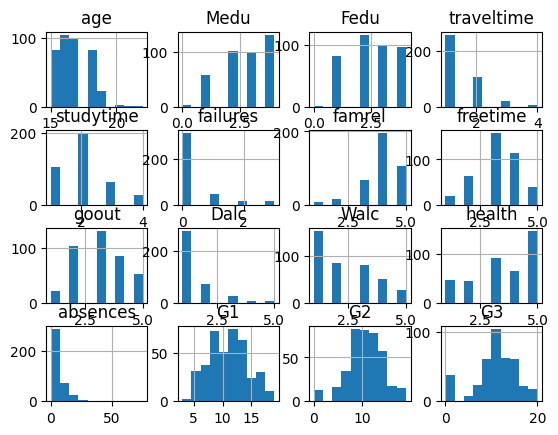

In [80]:
df.hist()
plt.show()

In [81]:
shapiro(df['G1'])

ShapiroResult(statistic=0.9749146103858948, pvalue=2.4554813080612803e-06)

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

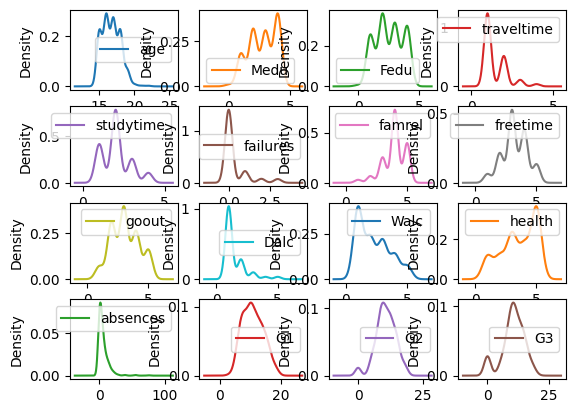

In [82]:
df.plot(kind='density', subplots=True, layout=(4,4),
sharex=False)

###4. Pré-Processamento dos Dados

####4.1) Vamos primeiramente começar removendo as instâncias com dados faltantes com o comando dropna (videoaula 2.2). Como vimos que nossa base de dados não tem dados faltantes (item 3.3 acima), esse é um comando opcional para esse problema. Mas você pode querer inseri-lo mesmo assim caso no futuro deseje treinar o mesmo modelo com outra base de dados que você não tem certeza se vai ter ou não dados faltantes.

In [83]:
df = df.dropna() # Removendo registros com valores nulos

####4.2) Você pode ainda inserir o código para remover as instâncias duplicadas, caso existam.

In [84]:
df = df.drop_duplicates() # Removendo registros duplicados

####4.3) Como a nossa variável de saída é numérica, ela vai ter que processada também. Assim,vamos começar criando a nossa variável de saída que vai ser um dataframe chamado y, com uma única coluna, que é a variável G3.

In [85]:
y = pd.DataFrame({'G3': df['G3']}) # Calculando a média entre as duas provas para o treinamento

In [86]:
y.head()

,G3
0,6
1,6
2,10
3,15
4,10


####4.4)Agora vamos criar o nosso dataframe X com as variáveis de entrada que queremos treinar o modelo. Por enquanto, vamos utilizar todas, mas nas próximas aulas vamos aprender métodos para automatizar o processo de escolha de variáveis.

In [87]:
X = df.iloc[:, :-1]

In [88]:
X.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,6,5,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,4,5,5
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,10,7,8
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,2,15,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,1,2,5,4,6,10


####4.5)A primeira coisa que você tem que fazer antes de escalar os dados é separar o conjunto de treinamento do conjunto de teste. Isso porque o treinamento não pode ser contaminado indiretamente pelo processamento que você vai realizar. Por exemplo, se você considerar todo o conjunto de dados para a normalização, você está usando informação dos dados de teste para o treinamento, o que pode fazer com que seu algoritmo tenha um desempenho melhor do que o real. Embora esse seja um tipo de vazamento de dados (do inglês data leakage) indireto e menos perigoso que o data leakage direto (quando usamos dados do teste no treinamento), ainda assim deve ser evitado e uma boa prática é separar os dados antes de escalá-los ou realizar qualquer tipo de pré-processamento que forneça informações. Você pode usar o comando train_test_split visto na videoaula 2.3.

In [89]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=35) #Separando os dados para o modelo

In [90]:
X_train.head() # Disposição dos dados do conjunto de dados de treino

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
38,GP,F,15,R,GT3,T,3,4,services,health,...,no,4,3,2,1,1,5,2,12,12
292,GP,F,18,U,LE3,T,2,1,services,at_home,...,yes,5,4,3,1,1,5,12,12,12
64,GP,F,15,U,LE3,T,4,3,services,services,...,yes,4,4,4,2,4,2,0,10,10
127,GP,F,19,U,GT3,T,0,1,at_home,other,...,no,3,4,2,1,1,5,2,7,8
283,GP,F,18,U,GT3,T,1,1,other,other,...,no,5,4,4,1,1,4,4,8,9


####4.6.1) Processo automatizado de onehot-encoding.

In [91]:

dicionarioCategory = []

categorias_unicas = []

# Percorre as colunas que possuem o tipo "object" do DataFrame criando um dicionario com a chave sendo o nome da coluna e o valor sendo as categorias dessa coluna
for column in df:
  if df[column].dtype == 'object':
      categorias_unicas = df[column].unique()

      array_categorias = categorias_unicas.tolist()
      dicionarioCategory.append({column: array_categorias})
print(dicionarioCategory)

[{'school': ['GP', 'MS']}, {'sex': ['F', 'M']}, {'address': ['U', 'R']}, {'famsize': ['GT3', 'LE3']}, {'Pstatus': ['A', 'T']}, {'Mjob': ['at_home', 'health', 'other', 'services', 'teacher']}, {'Fjob': ['teacher', 'other', 'services', 'health', 'at_home']}, {'reason': ['course', 'other', 'home', 'reputation']}, {'guardian': ['mother', 'father', 'other']}, {'schoolsup': ['yes', 'no']}, {'famsup': ['no', 'yes']}, {'paid': ['no', 'yes']}, {'activities': ['no', 'yes']}, {'nursery': ['yes', 'no']}, {'higher': ['yes', 'no']}, {'internet': ['no', 'yes']}, {'romantic': ['no', 'yes']}]


In [92]:

def mofify(dataSet):
  for i in dicionarioCategory:
      column = list(i.keys())[0]

      # Verifica se há menos ou igual a 2 categorias, casos binários 0 para a primeira categoria do dicionario e 1 para a segunda categoria
      if len(list(i.values())[0]) <= 2:
          # Itera sobre os valores da coluna
          for value in dataSet[column]:
              # Converte o valor para 0 ou 1
              if value == list(i.values())[0][0]:
                  dataSet[column].replace({value: 0}, inplace=True)
              else:
                  dataSet[column].replace({value: 1}, inplace=True)
      else:
          # Se houver mais de 2 categorias, aplica one-hot encoding pois não se encaixa na classificação binária
          df_encoded = pd.get_dummies(dataSet[column], prefix=column) # Gera o One Hot Encoder

          column_encode = list(df_encoded.columns) # Pega a lista de colunas geradas pelo One Hot Encoder
          dataSet = pd.concat([dataSet, df_encoded], axis=1) # Une os dois conjuntos de dados, o original e o gerado do One Hot Encoder
          dataSet.drop(column, axis=1, inplace=True) # Drop do valor no eixo 1 (axis) indicando que é uma coluna que teve seu processo de One Hot Encoder

          # Converte o tipo false ou true para 0 ou 1
          for coluna in column_encode:
            dataSet[coluna] = dataSet[coluna].astype(int)
  return dataSet


####4.6.2) Agora você pode verificar se você tem variáveis categóricas e realizar o processo de one-hot-encoding, como explicado nas videoaulas 2.2 e 2.3, como mostrado a seguir, onde coluna1 e coluna2 são os nomes das colunas nas quais você quer normalizar. Forneça apenas os nomes das colunas que queira aplicar o one-hotencoding.

In [93]:
X_train = mofify(X_train) # Chama a função para tratar os dados
X_test = mofify(X_test) # Chama a função para tratar os dados

# OBS é feito de forma separada conforme solicitado pela professora.

In [94]:
X_train.head() # Disposição dos dados para visualizar o tratamento dos dados realizado

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
38,1,1,15,1,1,1,3,4,1,3,...,0,0,0,1,0,0,0,0,1,0
292,1,1,18,0,1,1,2,1,1,2,...,0,0,0,0,0,0,1,0,1,0
64,1,1,15,0,1,1,4,3,1,2,...,0,1,0,0,0,0,1,1,0,0
127,1,1,19,0,1,1,0,1,1,2,...,1,0,0,1,0,0,0,0,0,1
283,1,1,18,0,1,1,1,1,2,2,...,1,0,0,0,1,0,0,0,1,0


In [95]:
X_test.head() # Disposição dos dados para visualizar o tratamento dos dados realizado

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
17,1,1,16,1,1,1,3,3,3,2,...,1,0,0,0,0,0,1,0,1,0
355,1,1,18,1,1,1,3,3,1,2,...,0,1,0,1,0,0,0,1,0,0
311,1,1,19,1,1,1,2,1,3,2,...,1,0,0,0,0,1,0,0,0,1
103,1,1,15,1,1,1,3,2,2,2,...,1,0,0,0,1,0,0,0,1,0
195,1,1,17,1,1,1,2,4,1,2,...,0,1,0,1,0,0,0,1,0,0


####4.7) Agora, você pode normalizar todos os dados numéricos usando o objeto MinMaxScaler() e seus métodos. Observe que embora a padronização em si vai ser realizada em todos os dados, você deve ajustar os dados considerando apenas os dados de treinamento (o ajuste pega o valor máximo e mínimo e faz os cálculos necessários). Para isso, você vai usar os comandos fit() e transform() separadamente. O fit() vai receber apenas os dados de treinamento e o transform() deve ser realizado nos dados de treinamento e teste separadamente. Aqui, também observe que G1 e G2 possuem como maior valor 19 (essa foi a maior nota que um aluno tirou), mas que seu valor máximo real é 20. Você pode ajustar manualmente o valor máximo do MinMaxScaler(). Olhe a documentação da classe para descobrir como fazer:

#####Normalizando os Dados

In [112]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

####4.8) Segundo vários autores nem sempre há uma regra que define quando se deve normalizar ou padronizar os dados. Assim, talvez você queira criar o código necessário para testar as várias possibilidades: (1) sem re-escalar os dados, (2) apenas padronizando, e (3) apenas normalizando. A maneira mais simples é criar uma célula diferente para cada cenário e comentar os cenários que não quer testar. Mas fique livre para pensar em outras formas.

#####Regressão Linear

######Modelo Sem Re-Escalar os Dados

In [119]:
modelo = LinearRegression()
modelo.fit(X_train, Y_train)

LinearRegression()

######Modelo Normalizando os Dados

In [145]:
model_lr_scaled = LinearRegression()
model_lr_scaled.fit(X_train_scaled, Y_train)

LinearRegression()

#####Árvore de Decisão

######Modelo Sem Re-Escalar os Dados

In [128]:
model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=42)

######Modelo Normalizando os Dados

In [124]:
model_dt_scaled = DecisionTreeRegressor(random_state=42)
model_dt_scaled.fit(X_train_scaled, Y_train)

DecisionTreeRegressor(random_state=42)

###5. Treinamento do Modelo

####Regressão Linear

#####Modelo Sem os dados Re-Escalados

In [150]:
Y_pred = modelo.predict(X_test)

#####Modelo com os Dados Normalizados

In [151]:
Y_pred_Norm = model_lr_scaled.predict(X_test_scaled)

####Árvore de Decisão

#####Modelo Sem os dados Re-Escalados

In [152]:
y_pred_dt = model_dt.predict(X_test)

#####Modelo com os Dados Normalizados

In [153]:
y_pred_dt_scaled = model_dt_scaled.predict(X_test_scaled)

###6. Avaliação do Modelo

####Regressão Linear

#####Modelo Sem Re-Escalar os Dados

In [154]:
# Calcular métricas
mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 3.768442133394222
Root Mean Squared Error (RMSE): 1.94124757138141
Mean Absolute Error (MAE): 1.2572228819033244
R-squared (R²): 0.826814904195537


#####Modelo Normalizando os Dados

In [155]:
# Calcular métricas
mse = mean_squared_error(Y_test, Y_pred_Norm)
rmse = mean_squared_error(Y_test, Y_pred_Norm, squared=False)
mae = mean_absolute_error(Y_test, Y_pred_Norm)
r2 = r2_score(Y_test, Y_pred_Norm)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 3.7611853335084033
Root Mean Squared Error (RMSE): 1.9393775634229666
Mean Absolute Error (MAE): 1.2570903361344539
R-squared (R²): 0.8271484026383876


####Árvore de Decisão

#####Modelo Sem Re-Escalar os Dados

In [156]:
# Calcular métricas
mse = mean_squared_error(Y_test, y_pred_dt)
rmse = mean_squared_error(Y_test, y_pred_dt, squared=False)
mae = mean_absolute_error(Y_test, y_pred_dt)
r2 = r2_score(Y_test, y_pred_dt)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 3.7983193277310923
Root Mean Squared Error (RMSE): 1.9489277379449172
Mean Absolute Error (MAE): 1.1260504201680672
R-squared (R²): 0.8254418474839196


#####Modelo Normalizando os Dados

In [157]:
# Calcular métricas
mse = mean_squared_error(Y_test, y_pred_dt_scaled)
rmse = mean_squared_error(Y_test, y_pred_dt_scaled, squared=False)
mae = mean_absolute_error(Y_test, y_pred_dt_scaled)
r2 = r2_score(Y_test, y_pred_dt_scaled)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 3.7815126050420167
Root Mean Squared Error (RMSE): 1.9446111706564932
Mean Absolute Error (MAE): 1.1092436974789917
R-squared (R²): 0.8262142286897429


###**Justificativa**
####Com base nas métricas, o modelo de Regressão Linear com dados normalizados apresentam um desempenho ligeiramente melhor em termos de R² em comparação com os modelos sem normalização. No entanto, para métricas de erro como MSE, RMSE e MAE, não houve uma diferença substancial entre os modelos com e sem normalização.

####Portanto, a normalização pode beneficiar o desempenho da Regressão Linear em termos de explicação da variabilidade dos dados, mas não teve um impacto significativo nas métricas de erro para os modelos avaliados. A escolha entre normalizar ou não os dados pode depender de outros fatores, como a interpretabilidade do modelo e a natureza dos dados específicos do problema.